# SCI 2206 DATA ANALYTICS MINI-PROJECT(CAR PRICE PRIDICTION)

**GROUP MEMBERS (INFORMATICS PART 2, 2023)**
1. SANELE HADEBE NO2132677F
2. THANDEKA KHUMALO N02132964E
3. BLESSED PANDENI N02126010N
4. BOAZ MAKUMBE N02126854B
5. PHILIPA MURINDAGOMO N02126010N
6. MODESTER SIBANDA N0198781E

### 1. Importing the Modules/Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from __future__ import absolute_import, division, print_function
import pathlib

print(tf.__version__)

2.12.0


### 2. Loading the datasets

In [2]:
train_data = pd.read_csv("car_prices_train.csv")
test_data= pd.read_csv("car_prices_test.csv")

#Displat the training dataset
train_data.head()

,make,model,year,mileage,price,color,state,date
0,Nissan,Fusion,2016,35656,15820,black,CA,2023-09-30 23:02:01.648867
1,Ford,Altima,2010,72079,10539,silver,FL,2023-04-09 23:02:01.649616
2,Honda,Accord,2014,38851,10247,blue,CA,2023-09-16 23:02:01.649693
3,Ford,Accord,2018,20835,25712,white,IL,2023-11-03 23:02:01.649710
4,Ford,Accord,2015,57307,22564,silver,FL,2023-03-08 23:02:01.649313


In [3]:
#Check Test Data
test_data.head()

,make,model,year,mileage,price,color,state,date
0,Toyota,Cruze,2017,19882,34176,red,IL,2023-08-08 23:02:01.648413
1,Ford,Cruze,2016,95349,26655,red,NY,2023-12-14 23:02:01.648426
2,Toyota,Accord,2017,23744,10359,silver,IL,2024-01-27 23:02:01.648428
3,Honda,Fusion,2014,55370,23514,white,CA,2023-11-01 23:02:01.648436
4,Honda,Cruze,2013,41146,27168,red,IL,2023-07-15 23:02:01.648439


### 3.Check for missing Values

In [4]:
train_data.isna().sum()

make       0
model      0
year       0
mileage    0
price      0
color      0
state      0
date       0
dtype: int64

In [5]:
test_data.isna().sum()

make       0
model      0
year       0
mileage    0
price      0
color      0
state      0
date       0
dtype: int64

We can see from the above result that our datasets does not contain any missing values.

### 4. Check for column datatypes

In [6]:
train_data.dtypes

make       object
model      object
year        int64
mileage     int64
price       int64
color      object
state      object
date       object
dtype: object

In [7]:
test_data.dtypes

make       object
model      object
year        int64
mileage     int64
price       int64
color      object
state      object
date       object
dtype: object

### 5.Apply One-Hot Encoding to our categorical variables

Since Neural Networks work with numbers, it means we have to convert our categorical variables to numeric form and one-hot encoding is a perfect method for this.

In [8]:
#Drop Date Column
df= train_data.drop('date', axis = 'columns')

df_encoded= pd.get_dummies(data = df, columns = ['make','model','color', 'state'])
df_encoded = df_encoded.astype(int)
df_encoded.head()

,year,mileage,price,make_Chevrolet,make_Ford,make_Honda,make_Nissan,make_Toyota,model_Accord,model_Altima,...,color_black,color_blue,color_red,color_silver,color_white,state_CA,state_FL,state_IL,state_NY,state_TX
0,2016,35656,15820,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2010,72079,10539,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2014,38851,10247,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,2018,20835,25712,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,2015,57307,22564,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [9]:
#Do likewise we apply One-Hot encoding to the test Data
#Drop Date Column
test_dataset= test_data.drop('date', axis = 'columns')

test_dataset= pd.get_dummies(data = test_dataset, columns = ['make','model','color', 'state'])
test_dataset = test_dataset.astype(int)
test_dataset.head()

,year,mileage,price,make_Chevrolet,make_Ford,make_Honda,make_Nissan,make_Toyota,model_Accord,model_Altima,...,color_black,color_blue,color_red,color_silver,color_white,state_CA,state_FL,state_IL,state_NY,state_TX
0,2017,19882,34176,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2016,95349,26655,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2017,23744,10359,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
3,2014,55370,23514,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,2013,41146,27168,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


### 6.Inspecting the data

Now we'll plot a pairplot of our features in order to ascertain if there is any correlations between the features in the dataset.

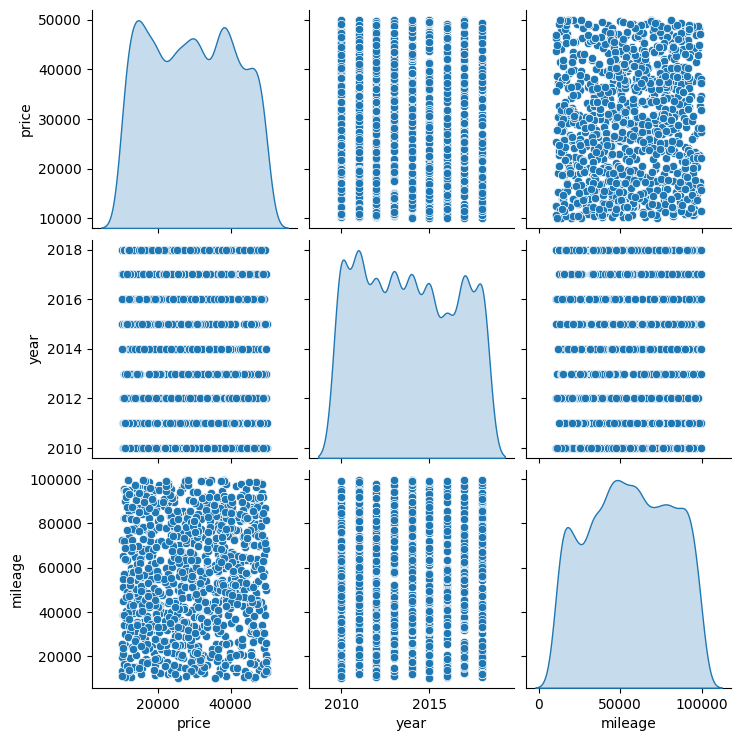

In [10]:
sns.pairplot(df_encoded[['price', 'year', 'mileage']], diag_kind="kde")

Looks like the dataset has complex lon-linear relationships. Hence the Need to utilize Artificial Neural Networks (ANN) to learn the complex relationship between the features and target due to the presence of activation function in each layer.

Also look at the overall statistics:

In [11]:
train_stats = df_encoded.describe()
train_stats.pop('price')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
year,8000.0,2013.842875,2.626271,2010.0,2011.0,2014.0,2016.0,2018.0
mileage,8000.0,55624.924875,25115.297964,10284.0,34825.0,55674.0,77133.0,99783.0
make_Chevrolet,8000.0,0.206625,0.404909,0.0,0.0,0.0,0.0,1.0
make_Ford,8000.0,0.189125,0.391632,0.0,0.0,0.0,0.0,1.0
make_Honda,8000.0,0.173000,0.378271,0.0,0.0,0.0,0.0,1.0
make_Nissan,8000.0,0.224625,0.417361,0.0,0.0,0.0,0.0,1.0
make_Toyota,8000.0,0.206625,0.404909,0.0,0.0,0.0,0.0,1.0
model_Accord,8000.0,0.209250,0.406799,0.0,0.0,0.0,0.0,1.0
model_Altima,8000.0,0.189375,0.391831,0.0,0.0,0.0,0.0,1.0
model_Camry,8000.0,0.189500,0.391930,0.0,0.0,0.0,0.0,1.0


### 7. Split Features from labels

Since we have two separate datasets for training and testing, we dont have to split the dataset but we only have to separate the target value, or "label", from the features. This label is the value that we'll train the model to predict

In [12]:
train_labels = df_encoded.pop('price')

In [13]:
test_labels = test_dataset.pop('price')

In [14]:
test_labels

0       34176
1       26655
2       10359
3       23514
4       27168
        ...  
1995    37810
1996    12039
1997    44781
1998    45393
1999    30832
Name: price, Length: 2000, dtype: int32

### 8. Normalize the data

It is good practice to normalize features that use different scales and ranges. Although the model might converge without normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

Note: Although we intentionally generate these statistics from only the training dataset, the statistics will be used to normalize the test dataset. We need to do that so that we project the test dataset into the same distribution that the model has been trained on.

In [15]:
def norm(x):
    return (x - train_stats['mean'])/ train_stats['std']

normed_train_data = norm(df_encoded)
normed_test_data = norm(test_dataset)

In [16]:
normed_train_data

,year,mileage,make_Chevrolet,make_Ford,make_Honda,make_Nissan,make_Toyota,model_Accord,model_Altima,model_Camry,...,color_black,color_blue,color_red,color_silver,color_white,state_CA,state_FL,state_IL,state_NY,state_TX
0,0.821364,-0.795090,-0.510299,-0.482915,-0.457344,1.857803,-0.510299,-0.514382,-0.483308,-0.483505,...,2.067131,-0.484488,-0.511466,-0.530665,-0.489203,1.913517,-0.503092,-0.458343,-0.506406,-0.508937
1,-1.463244,0.655142,-0.510299,2.070501,-0.457344,-0.538203,-0.510299,-0.514382,2.068814,-0.483505,...,-0.483702,-0.484488,-0.511466,1.884193,-0.489203,-0.522533,1.987461,-0.458343,-0.506406,-0.508937
2,0.059828,-0.667877,-0.510299,-0.482915,2.186264,-0.538203,-0.510299,1.943836,-0.483308,-0.483505,...,-0.483702,2.063774,-0.511466,-0.530665,-0.489203,1.913517,-0.503092,-0.458343,-0.506406,-0.508937
3,1.582900,-1.385209,-0.510299,2.070501,-0.457344,-0.538203,-0.510299,1.943836,-0.483308,-0.483505,...,-0.483702,-0.484488,-0.511466,-0.530665,2.043886,-0.522533,-0.503092,2.181500,-0.506406,-0.508937
4,0.440596,0.066974,-0.510299,2.070501,-0.457344,-0.538203,-0.510299,1.943836,-0.483308,-0.483505,...,-0.483702,-0.484488,-0.511466,1.884193,-0.489203,-0.522533,1.987461,-0.458343,-0.506406,-0.508937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-1.082476,1.449757,-0.510299,-0.482915,2.186264,-0.538203,-0.510299,-0.514382,-0.483308,2.067972,...,2.067131,-0.484488,-0.511466,-0.530665,-0.489203,-0.522533,-0.503092,-0.458343,1.974455,-0.508937
7996,0.821364,-1.660340,-0.510299,-0.482915,-0.457344,1.857803,-0.510299,-0.514382,-0.483308,2.067972,...,2.067131,-0.484488,-0.511466,-0.530665,-0.489203,-0.522533,-0.503092,2.181500,-0.506406,-0.508937
7997,-0.320940,0.856373,-0.510299,-0.482915,-0.457344,-0.538203,1.959389,-0.514382,2.068814,-0.483505,...,2.067131,-0.484488,-0.511466,-0.530665,-0.489203,-0.522533,-0.503092,2.181500,-0.506406,-0.508937
7998,-0.701708,-1.792610,-0.510299,2.070501,-0.457344,-0.538203,-0.510299,-0.514382,-0.483308,2.067972,...,-0.483702,-0.484488,-0.511466,-0.530665,2.043886,-0.522533,-0.503092,-0.458343,1.974455,-0.508937


In [17]:
#Ensure columns in normalized training set and test set adhere to the same order
normed_test_data = normed_test_data[list(normed_train_data.columns)]
normed_test_data

,year,mileage,make_Chevrolet,make_Ford,make_Honda,make_Nissan,make_Toyota,model_Accord,model_Altima,model_Camry,...,color_black,color_blue,color_red,color_silver,color_white,state_CA,state_FL,state_IL,state_NY,state_TX
0,1.202132,-1.423154,-0.510299,-0.482915,-0.457344,-0.538203,1.959389,-0.514382,-0.483308,-0.483505,...,-0.483702,-0.484488,1.954918,-0.530665,-0.489203,-0.522533,-0.503092,2.181500,-0.506406,-0.508937
1,0.821364,1.581668,-0.510299,2.070501,-0.457344,-0.538203,-0.510299,-0.514382,-0.483308,-0.483505,...,-0.483702,-0.484488,1.954918,-0.530665,-0.489203,-0.522533,-0.503092,-0.458343,1.974455,-0.508937
2,1.202132,-1.269383,-0.510299,-0.482915,-0.457344,-0.538203,1.959389,1.943836,-0.483308,-0.483505,...,-0.483702,-0.484488,-0.511466,1.884193,-0.489203,-0.522533,-0.503092,2.181500,-0.506406,-0.508937
3,0.059828,-0.010150,-0.510299,-0.482915,2.186264,-0.538203,-0.510299,-0.514382,-0.483308,-0.483505,...,-0.483702,-0.484488,-0.511466,-0.530665,2.043886,1.913517,-0.503092,-0.458343,-0.506406,-0.508937
4,-0.320940,-0.576498,-0.510299,-0.482915,2.186264,-0.538203,-0.510299,-0.514382,-0.483308,-0.483505,...,-0.483702,-0.484488,1.954918,-0.530665,-0.489203,-0.522533,-0.503092,2.181500,-0.506406,-0.508937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.463244,-0.100971,-0.510299,-0.482915,-0.457344,-0.538203,1.959389,-0.514382,-0.483308,-0.483505,...,2.067131,-0.484488,-0.511466,-0.530665,-0.489203,1.913517,-0.503092,-0.458343,-0.506406,-0.508937
1996,1.582900,-0.332902,1.959389,-0.482915,-0.457344,-0.538203,-0.510299,1.943836,-0.483308,-0.483505,...,-0.483702,-0.484488,1.954918,-0.530665,-0.489203,1.913517,-0.503092,-0.458343,-0.506406,-0.508937
1997,0.059828,1.068913,-0.510299,2.070501,-0.457344,-0.538203,-0.510299,-0.514382,2.068814,-0.483505,...,-0.483702,-0.484488,-0.511466,-0.530665,2.043886,-0.522533,-0.503092,2.181500,-0.506406,-0.508937
1998,-0.320940,0.855338,-0.510299,-0.482915,-0.457344,-0.538203,1.959389,-0.514382,-0.483308,2.067972,...,-0.483702,-0.484488,-0.511466,-0.530665,2.043886,1.913517,-0.503092,-0.458343,-0.506406,-0.508937


This normalized data is what we'll use to train the model.

**Caution**: The statistics used to normalize the inputs here(mean and standard deviation) need to be applied to any other data that is fed to the model, along with the one-hot encoding that we did earlier. That includes the test set as well as live data when the model is used in production.

### 9. The Model

#### Build the Model

Now we'll build our model, Here, we'll use a Sequential model with two densely connected hidden layers that return a single, continuous value. We've wrapped the model building steps in a function, **`build_model()`**.

In [18]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation= tf.nn.relu, input_shape = [len(df_encoded.keys())]),
        layers.Dense(64, activation = tf.nn.relu),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss= 'mse',
                 optimizer = optimizer,
                 metrics= ['mae', 'mse'])
    return model

In [19]:
model = build_model()

#### Inspect the model

We use the **`.summary()`** method to print a simple description of our model.

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1472      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,697
Trainable params: 5,697
Non-trainable params: 0
_________________________________________________________________


Now we'll try out the model to test if we're heading in the right direction. We'll take a batch of 10 examples from the training data and call **`model.predict()`** on it.

In [21]:
c

1/1 [==============================] - 1s 656ms/step


array([[-0.04522172],
       [ 0.60088277],
       [-0.6474579 ],
       [ 0.34401482],
       [ 0.23819968],
       [ 0.14340574],
       [ 0.02973255],
       [ 0.01302338],
       [ 0.4218522 ],
       [ 0.08314283]], dtype=float32)

It seems to be working and produces a result of the expected shape and type.

**Note:** we haven't trained the model yet, the above is just a way to test if we're good to proceed

#### Train the model

Now we'll train the model for 1000 epochs, and record the training and validation accuracy in the history object

In [22]:
#Display the training progress by printing a dot to the sccreen for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
EPOCHS = 1000

history = model.fit(
    normed_train_data, 
    train_labels, 
    epochs= EPOCHS, 
    validation_split = 0.2, 
    verbose=0, 
    callbacks = [PrintDot()]
)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Now we'll visualize the model's training progress using the stats stored in the history object.

In [23]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,7349136.5,1396.820435,7349136.5,8535139.0,1553.569092,8535139.0,995
996,7346578.0,1393.693115,7346578.0,8478159.0,1548.328857,8478159.0,996
997,7345539.0,1385.127319,7345539.0,8590975.0,1552.869995,8590975.0,997
998,7332114.5,1385.236816,7332114.5,8603528.0,1555.170410,8603528.0,998
999,7317105.5,1382.918457,7317105.5,8541027.0,1536.593262,8541027.0,999


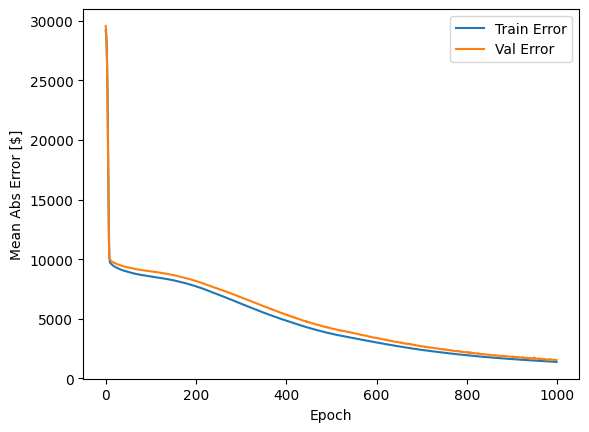

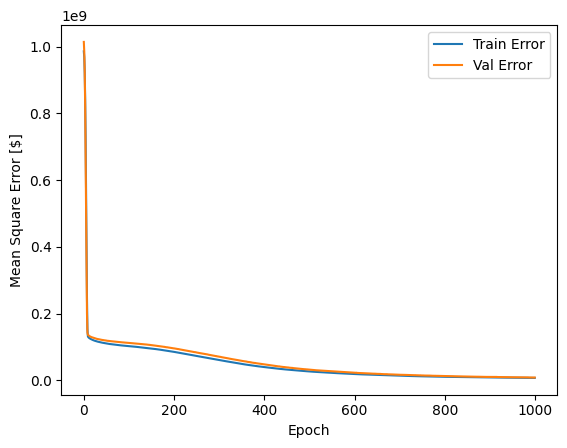

In [24]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [$]')
    plt.plot(hist['epoch'], hist['mae'], label = 'Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.legend()
    #plt.ylim([0, 5])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$]')
    plt.plot(hist['epoch'], hist['mse'], label = 'Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    #plt.ylim([0, 20])

plot_history(history)


Well it looks like the model generalized well on the training set as we can see that the Mean Squared Errors and the Mean Absolute Errors are reducing as expected(Minimizing or optimizing the Objective Function[MSE, MAE])

Let's see how the model generalizes by using the test set, which we did not use when training the model. This tells us how well we can expect the model to predict when we use it in the real-world.

In [50]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print(f"Testing set Mean Abs Error(MAE): ${round(mae,2)}")
import math
print(f"Testing set Root Mean Squared Error(RMSE): ${round(math.sqrt(mse),2)}")

Testing set Mean Abs Error(MAE): $1530.2
Testing set Root Mean Squared Error(RMSE): $2822.54


Well our model seem to be performing better with a small mrgin of error on average as indicated by the above metrics.

### 10. Make predictions

Finally predict the car prices using data in the testing set:

63/63 [==============================] - 0s 5ms/step


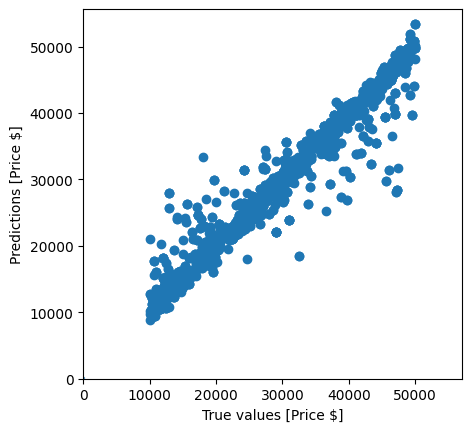

In [27]:

test_predictions= model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True values [Price $]')
plt.ylabel('Predictions [Price $]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_= plt.plot([-100, 100], [-100, 100])

It looks like our model predicts reasonably well. Now we'll take a look at the error distribution:

<Axes: xlabel='price', ylabel='Count'>

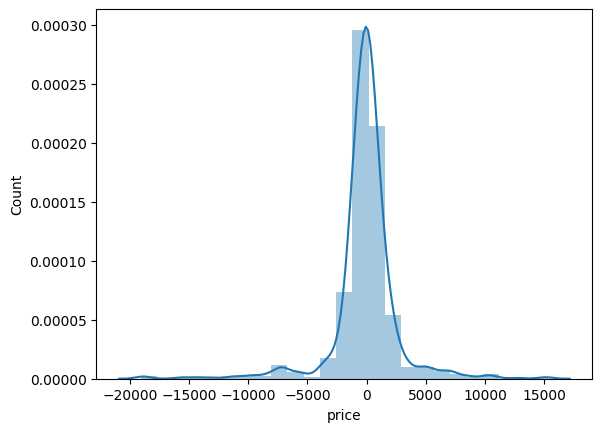

In [52]:
import warnings as w
w.filterwarnings('ignore')
plt.xlabel('Prediction Error [Price $]')
_= plt.ylabel('Count')
sns.distplot(error, bins = 25)

Well, its not Gaussian(Normally Distributed) but we can expect that because the number of samples is small.

Also, since its a Regression problem(predicting the outcome of a single continuous variable), it doesnt make sense to find the model score but the aim is to minimize the cost(MSE or MAE)

#### Tabulate some cmparisons of model's performance in prediction

In [53]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch).flatten()
example_result

1/1 [==============================] - 0s 169ms/step


array([36983.605, 27561.525, 12190.888, 23013.494, 27238.818, 15109.185,
       46138.176, 13240.557, 32718.193, 35767.05 ], dtype=float32)

In [54]:
p=pd.DataFrame()
p['Predicted'] = list(example_result[:10])
p['Actual'] = list(test_labels[:10])
p['Error'] = p['Actual'] - p['Predicted'] 
p.head(10)

,Predicted,Actual,Error
0,36983.605469,34176,-2807.605469
1,27561.525391,26655,-906.525391
2,12190.887695,10359,-1831.887695
3,23013.494141,23514,500.505859
4,27238.818359,27168,-70.818359
5,15109.184570,15233,123.815430
6,46138.175781,47153,1014.824219
7,13240.556641,13588,347.443359
8,32718.193359,32689,-29.193359
9,35767.050781,36340,572.949219


Just as its apparent in the above table, the model predicted the test set with a small margin of error.

**Note:** The negative sign in the Error column means that the model understated by that value and the positive sign means that the model overstated by that value in its predictions.

### 11. Saving the Model for production use

In [29]:
model.save('Car_Price_Prediction_Model.h5')
#model = tf.keras.models.load_model('Car_Price_Prediction_Model.h5') #same file path

# The End 